# Data Description

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility), the number of bikes rented per hour and date information.

-  Attribute Information:
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file.
bike_rent_df=pd.read_csv("D:\\Imarticus Class 33\\SEM 2\\Presentation\\sachin\\bike_sharing\\hour.csv",)

# Data Exploration And Data Cleaning

In [3]:
# Check 1st Five rows
bike_rent_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Check last 5 rows
bike_rent_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31-12-12,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-12,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-12,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-12,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-12,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(bike_rent_df.shape)} \n Total Rows are : {(bike_rent_df.shape)[0]}\n Total Columns are : {(bike_rent_df.shape)[1]}')

 The shape of dataset is (17379, 17) 
 Total Rows are : 17379
 Total Columns are : 17


In [6]:
# Check the info of dataset to know the data types of columns or variable
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Observations

## 1)Null values/missing values- 0
## 2)Date- columns need to convert into proper data type.
## 3)Columns to convert into numeric(for modelling Purpose)
 - season
 - holiday
 - workingday

In [7]:
# Check columns
bike_rent_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike_rent_df = bike_rent_df.drop('instant',axis=1)

In [9]:
bike_rent_df['dteday']=bike_rent_df['dteday'].astype('datetime64[ns]')

In [10]:
bike_rent_df['Month']=bike_rent_df['dteday'].dt.month

bike_rent_df['Day']=bike_rent_df['dteday'].dt.day_name()

In [11]:
bike_rent_df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,Saturday
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,Saturday
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,Saturday
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,Saturday
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,12,Monday
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,12,Monday
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,12,Monday
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,12,Monday


In [12]:
bike_rent_df['Weekdays_or_weekend']=bike_rent_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [13]:
bike_rent_df.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,Saturday,1
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,Saturday,1


In [14]:
bike_rent_df.drop("dteday",axis=1 ,inplace=True)

In [15]:
bike_rent_df.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [16]:
bike_rent_df['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [17]:
bike_rent_df.workingday.value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [18]:
bike_rent_df.mnth.value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

In [19]:
bike_rent_df['Weekdays_or_weekend'].value_counts()

0    12372
1     5007
Name: Weekdays_or_weekend, dtype: int64

In [20]:
bike_rent_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,6.528627,0.288106
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,3.440788,0.452894
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,4.000000,0.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,7.000000,0.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,10.000000,1.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,12.000000,1.000000


In [21]:
bike_rent_df.isnull().sum()

season                 0
yr                     0
mnth                   0
hr                     0
holiday                0
weekday                0
workingday             0
weathersit             0
temp                   0
atemp                  0
hum                    0
windspeed              0
casual                 0
registered             0
cnt                    0
Month                  0
Day                    0
Weekdays_or_weekend    0
dtype: int64

In [22]:
bike_rent_df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Month', 'Day', 'Weekdays_or_weekend'],
      dtype='object')

Text(0.5, 1.0, ' Visualising Missing Values')

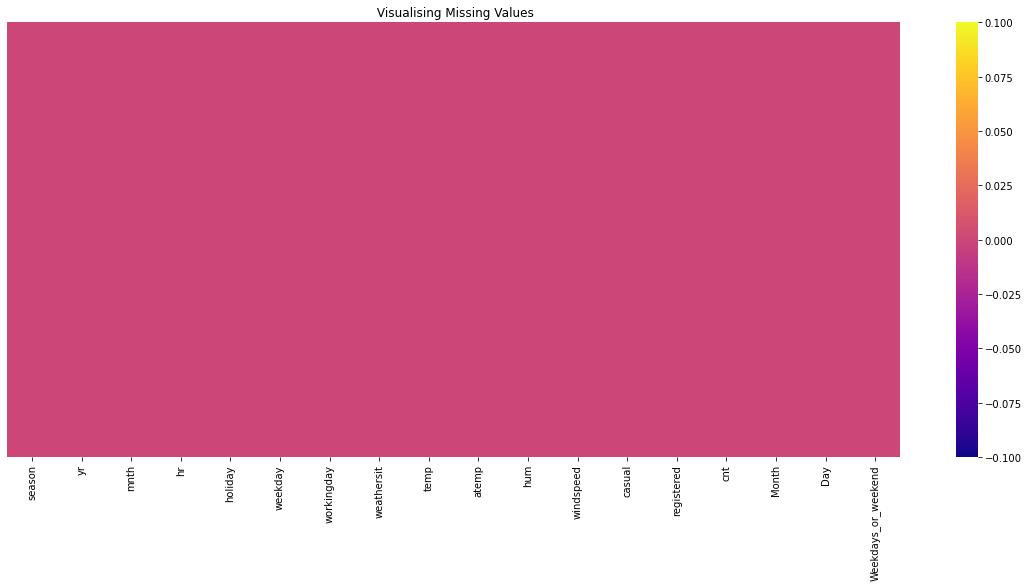

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(bike_rent_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [24]:
bike_rent_df['season']=bike_rent_df['season'].astype('category')
bike_rent_df['weathersit']=bike_rent_df['weathersit'].astype('category')
bike_rent_df['mnth']=bike_rent_df['mnth'].astype('category')
bike_rent_df['weekday']=bike_rent_df['weekday'].astype('category')

In [25]:
# numeric columns list
numeric_col=['temp',
 'atemp',
 'hum',
 'windspeed',]
numeric_col

['temp', 'atemp', 'hum', 'windspeed']

In [26]:
bike_rent_df.cnt.nunique()

869

In [27]:
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   season               17379 non-null  category
 1   yr                   17379 non-null  int64   
 2   mnth                 17379 non-null  category
 3   hr                   17379 non-null  int64   
 4   holiday              17379 non-null  int64   
 5   weekday              17379 non-null  category
 6   workingday           17379 non-null  int64   
 7   weathersit           17379 non-null  category
 8   temp                 17379 non-null  float64 
 9   atemp                17379 non-null  float64 
 10  hum                  17379 non-null  float64 
 11  windspeed            17379 non-null  float64 
 12  casual               17379 non-null  int64   
 13  registered           17379 non-null  int64   
 14  cnt                  17379 non-null  int64   
 15  Month              

<AxesSubplot:xlabel='cnt'>

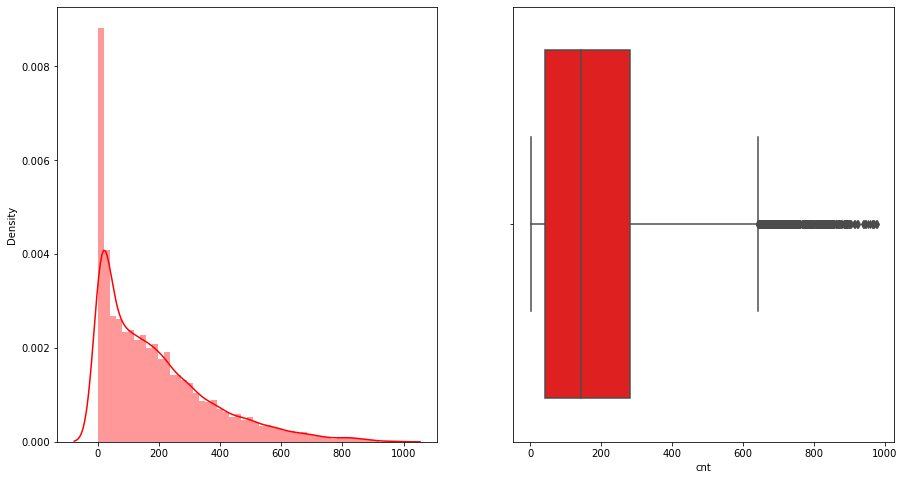

In [28]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=bike_rent_df['cnt'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=bike_rent_df['cnt'],color='red',ax=axes[1])

<AxesSubplot:xlabel='cnt'>

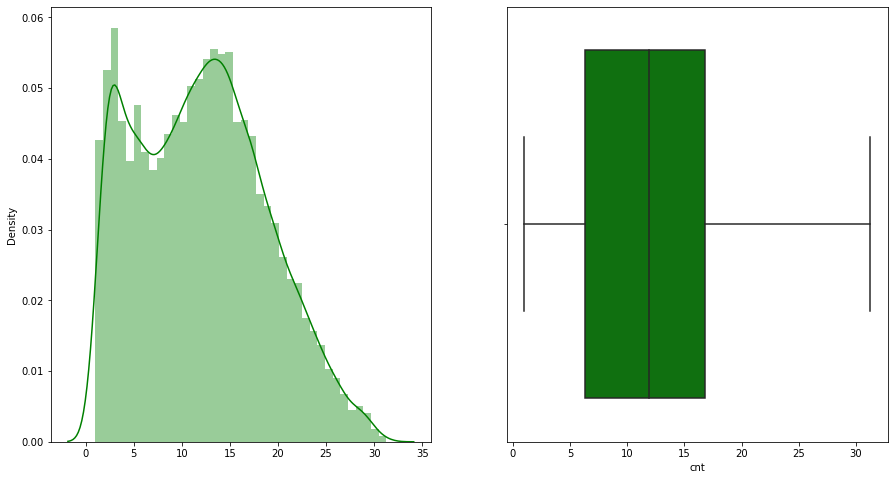

In [29]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(bike_rent_df['cnt']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_rent_df['cnt']),color='g',ax=axes[1])

['mnth', 'holiday', 'workingday']


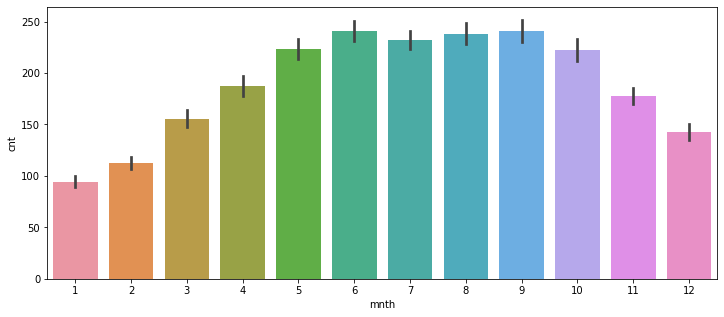

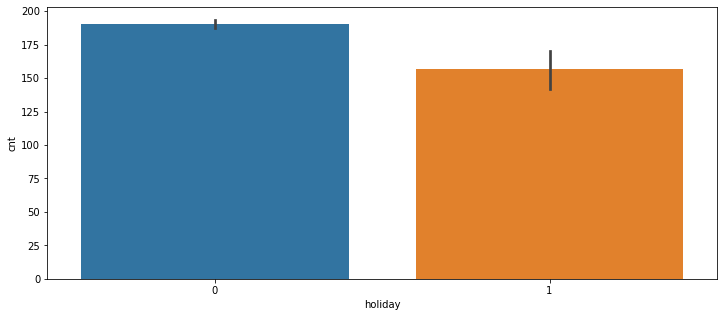

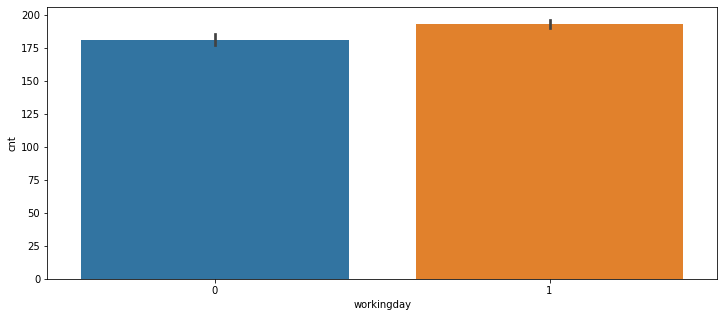

In [30]:
categorical_columns= ['mnth','holiday','workingday']

print(categorical_columns)
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=bike_rent_df[col],y=bike_rent_df['cnt'])

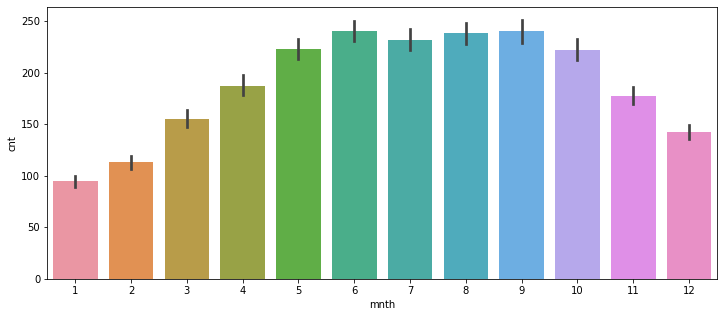

In [31]:
fig = plt.figure(figsize=(12, 5))

sns.barplot(x=bike_rent_df['mnth'],y=bike_rent_df['cnt']);

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

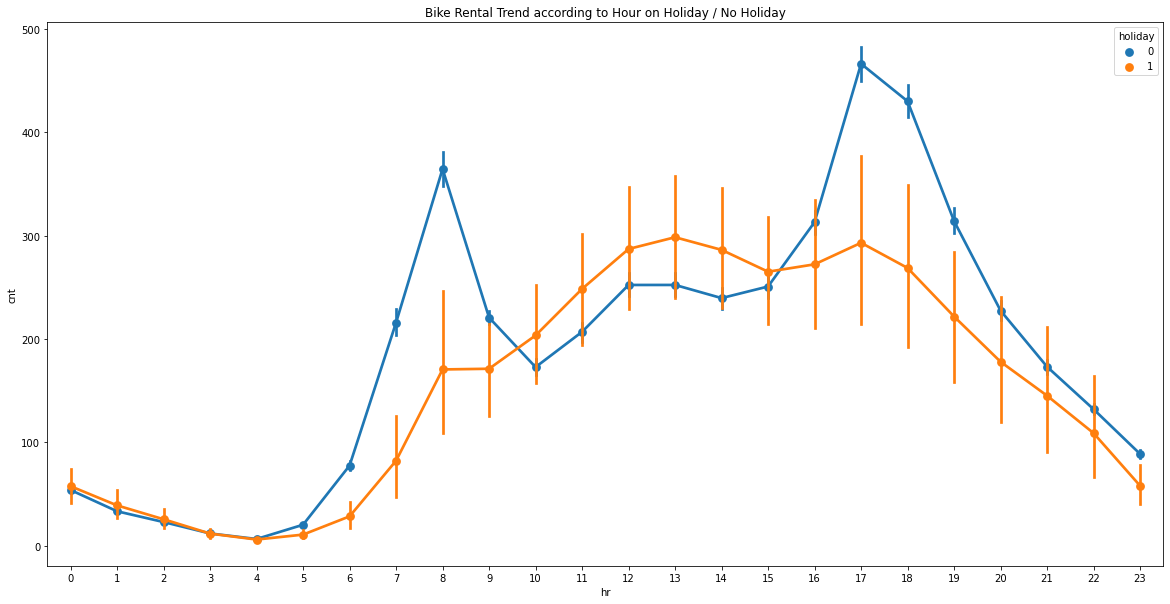

In [32]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

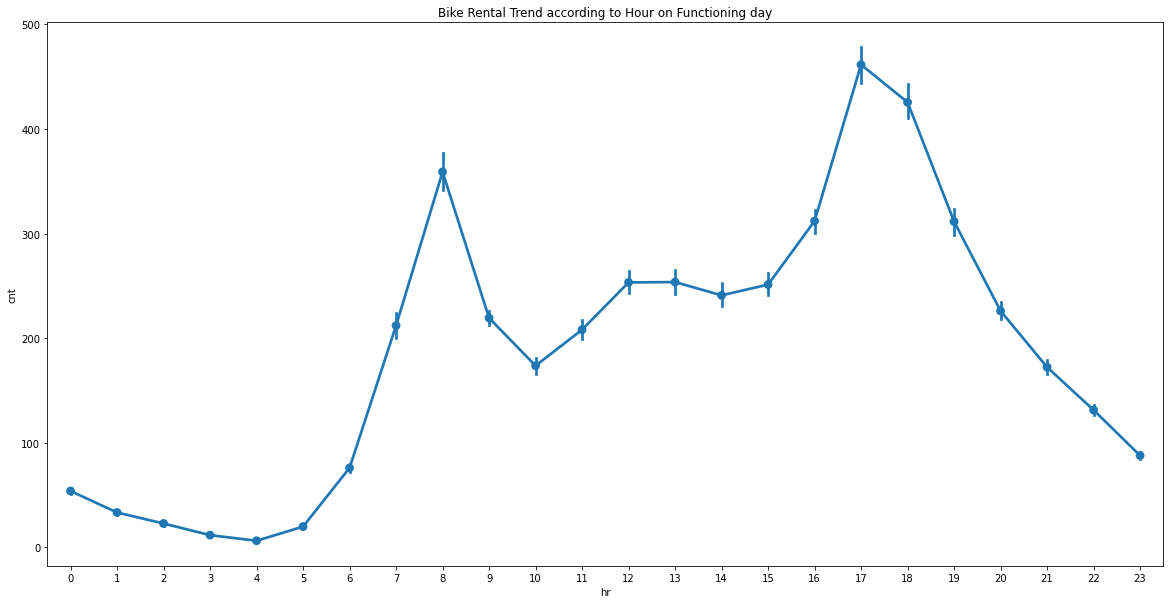

In [33]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

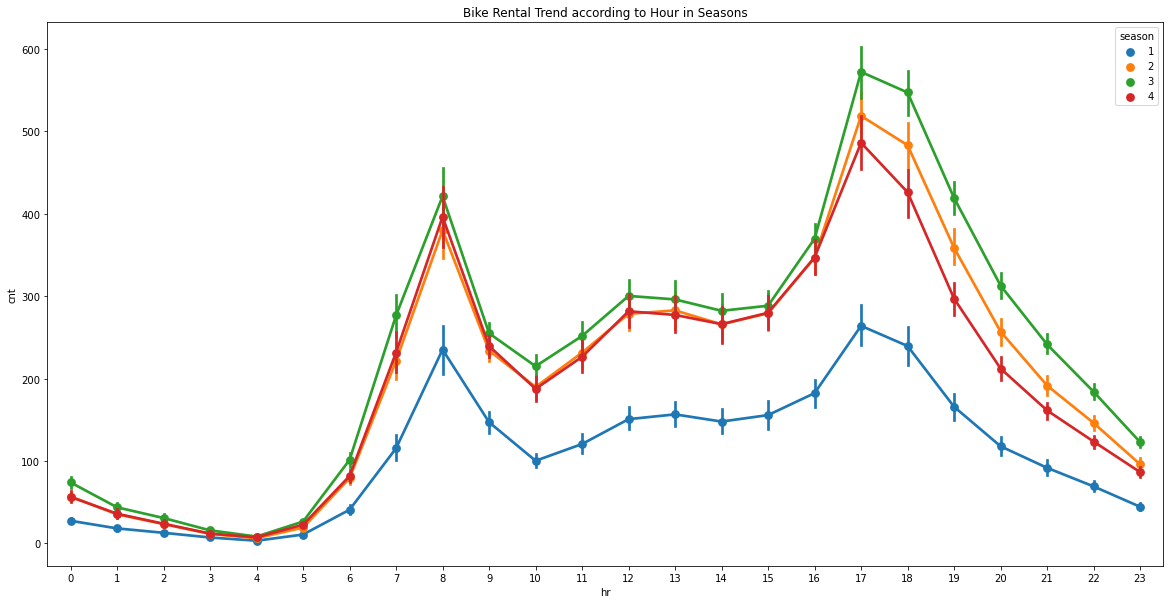

In [34]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['season'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

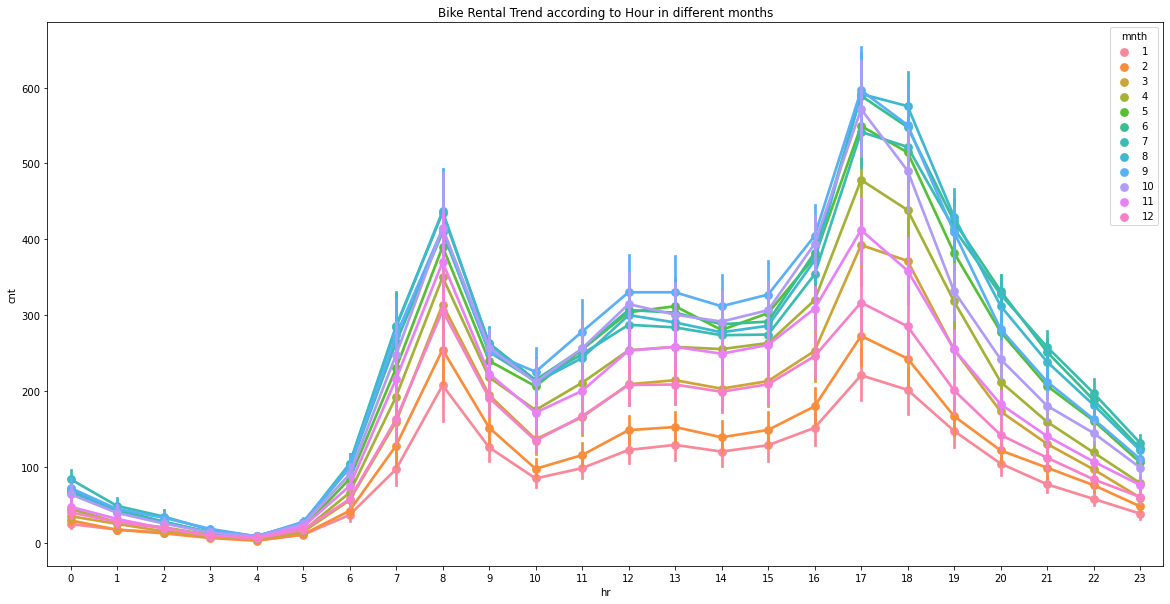

In [35]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['mnth'])
plt.title("Bike Rental Trend according to Hour in different months")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

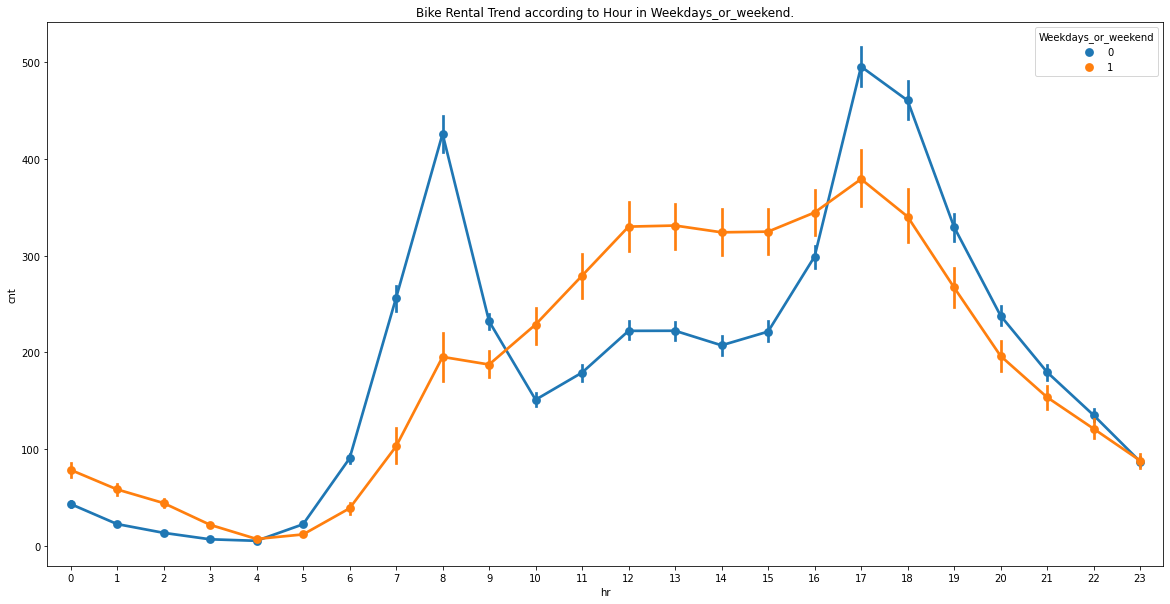

In [36]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")

<AxesSubplot:ylabel='Density'>

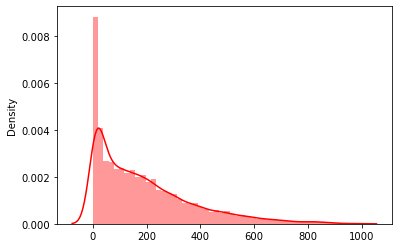

In [37]:
sns.distplot(x=bike_rent_df['cnt'],color='red')

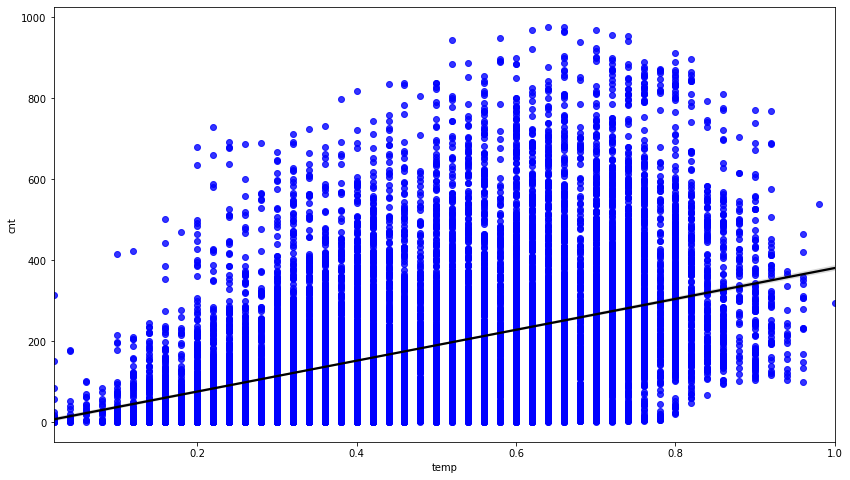

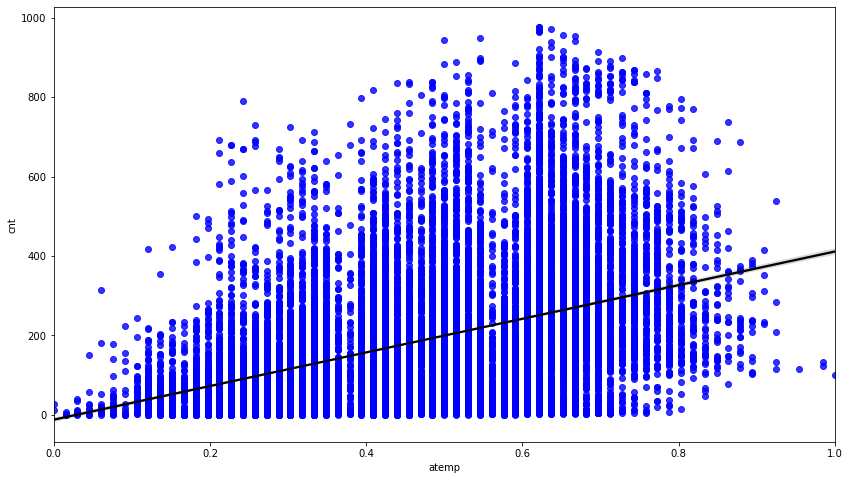

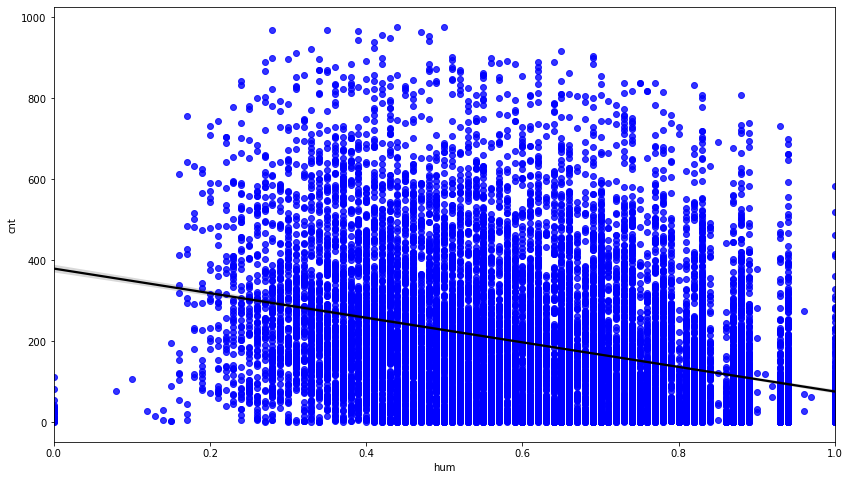

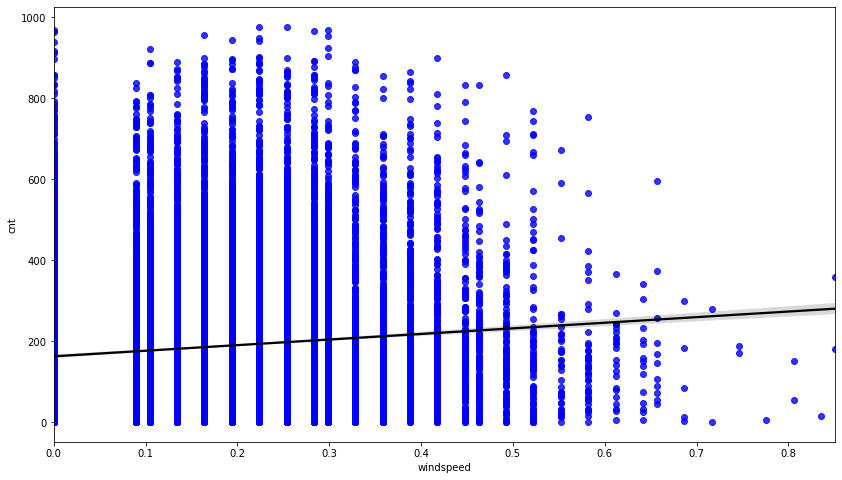

In [38]:
for col in numeric_col:
    plt.figure(figsize=(14,8))
    ax=fig.gca()
    sns.regplot(x=bike_rent_df[col],y=bike_rent_df['cnt'],scatter_kws={'color':'blue'},line_kws={'color':'black'})

<AxesSubplot:>

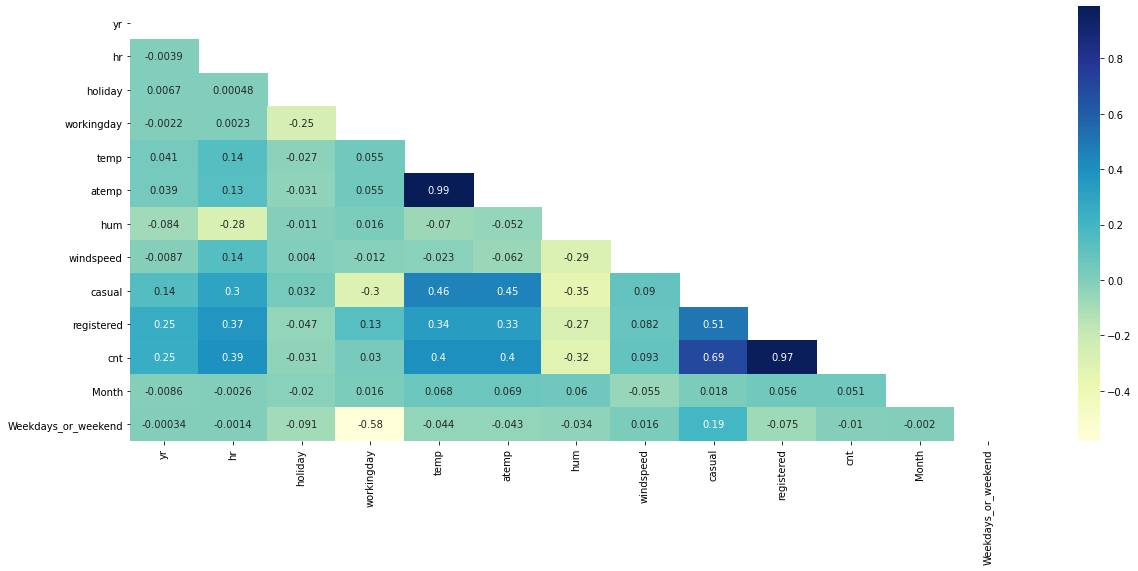

In [39]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(bike_rent_df.corr()))
sns.heatmap(bike_rent_df.corr(),annot=True,cmap="YlGnBu", mask=mask)

In [40]:
df=bike_rent_df.copy()

In [41]:
df.drop(['casual','registered'],inplace=True,axis=1)

In [42]:
df['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [43]:
df['season']=df['season'].astype('category')

In [44]:
df=pd.get_dummies(df,columns=['season'])

In [45]:
df['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [46]:
df.drop("Day",axis=1 ,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   yr                   17379 non-null  int64   
 1   mnth                 17379 non-null  category
 2   hr                   17379 non-null  int64   
 3   holiday              17379 non-null  int64   
 4   weekday              17379 non-null  category
 5   workingday           17379 non-null  int64   
 6   weathersit           17379 non-null  category
 7   temp                 17379 non-null  float64 
 8   atemp                17379 non-null  float64 
 9   hum                  17379 non-null  float64 
 10  windspeed            17379 non-null  float64 
 11  cnt                  17379 non-null  int64   
 12  Month                17379 non-null  int64   
 13  Weekdays_or_weekend  17379 non-null  int64   
 14  season_1             17379 non-null  uint8   
 15  season_2           

In [48]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

In [49]:
def perfomance_maeasure_train(reg,X_train, X_test, y_train, y_test, train=True,test=True):
    
    MAE= mean_absolute_error(y_train,reg.predict(X_train))
    #print(f"The Mean Absolute Error (MAE) is {MAE}.")

    MSE=mean_squared_error(y_train,reg.predict(X_train))
    #print(f"The Mean Squred Error(MSE) is {MSE}.")

    RMSE=np.sqrt(MSE)
    #print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

    R2=r2_score(y_train,reg.predict(X_train))
    #print(f"The R2 Score is {R2}.")

    traing_results_df=pd.DataFrame({'Model':reg.__class__.__name__,
                                    'MAE':round(MAE,4),
                                    'MSE':round(MSE,4),
                                    'RMSE':round(RMSE,4),
                                    'R2_score':round(R2,4)},index=[1])
    return traing_results_df

In [50]:
def perfomance_maeasure_test(reg,X_train, X_test, y_train, y_test, train=True,test=True):
    
    MAE= mean_absolute_error(y_test,reg.predict(X_test))
    #print(f"The Mean Absolute Error (MAE) is {MAE}.")

    MSE=mean_squared_error(y_test,reg.predict(X_test))
    #print(f"The Mean Squred Error(MSE) is {MSE}.")

    RMSE=np.sqrt(MSE)
    #print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

    R2=r2_score(y_test,reg.predict(X_test))
    #print(f"The R2 Score is {R2}.")
    
    traing_results_df=pd.DataFrame({'Model':reg.__class__.__name__,
                                    'MAE':round(MAE,4),
                                    'MSE':round(MSE,4),
                                    'RMSE':round(RMSE,4),
                                    'R2_score':round(R2,4)},index=[1])
    
    return traing_results_df 

In [51]:
X=df[['temp']]
y=np.sqrt(df['cnt'])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
from sklearn.linear_model import LinearRegression

s_reg=LinearRegression()
s_reg.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred_train=s_reg.predict(X_train)
y_pred_test=s_reg.predict(X_test)

In [55]:
single_linear_train = perfomance_maeasure_train(s_reg,X_train, X_test, y_train, y_test, train=True,test=True)
single_linear_train

,Model,MAE,MSE,RMSE,R2_score
1,LinearRegression,4.9406,37.2486,6.1032,0.1747


In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 4.940637343482449.
The Mean Squred Error(MSE) is 37.24864546803365.
The Root Mean Squared Error(RMSE) is 6.1031668392756275.
The R2 Score is 0.1747186386986963.


In [57]:
single_linear_test = perfomance_maeasure_test(s_reg,X_train, X_test, y_train, y_test, train=True,test=True)
single_linear_test

,Model,MAE,MSE,RMSE,R2_score
1,LinearRegression,4.8855,36.7584,6.0629,0.1824


In [58]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 4.885514052431577.
The Mean Squred Error(MSE) is 36.75835172105087.
The Root Mean Squared Error(RMSE) is 6.062866625701977.
The R2 Score is 0.18242331489371133.


In [59]:
X=df.drop('cnt',axis=1)
y=np.sqrt(df['cnt'])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12165, 17)
(12165,)
(5214, 17)
(5214,)


In [63]:
from sklearn.linear_model import LinearRegression

l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [64]:
l_reg.coef_

array([ 2.51221952e+00,  3.62200404e-01,  8.56234849e+00, -1.02970420e+00,
        5.14178260e-01, -3.96954555e-03, -4.29618267e-01,  7.38790381e+00,
        6.54828257e+00, -7.26573184e+00,  1.16063671e+00, -2.33360028e-01,
        8.40992699e-03, -6.37971281e-01,  3.42678828e-02, -1.07480896e+00,
        1.67851236e+00])

In [65]:
l_reg.intercept_

3.8107895989040195

In [66]:
l_reg.score(X_train,y_train)

0.475198799144942

In [67]:
y_pred_train=l_reg.predict(X_train)
y_pred_test=l_reg.predict(X_test)

In [68]:
mult_linear_train = perfomance_maeasure_train(l_reg,X_train, X_test, y_train, y_test, train=True,test=True)
mult_linear_train

,Model,MAE,MSE,RMSE,R2_score
1,LinearRegression,3.8527,23.6866,4.8669,0.4752


In [69]:
mult_linear_test = perfomance_maeasure_test(l_reg,X_train, X_test, y_train, y_test, train=True,test=True)
mult_linear_test

,Model,MAE,MSE,RMSE,R2_score
1,LinearRegression,3.7768,23.0329,4.7993,0.4877


# lasso

In [70]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.01)

In [71]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [72]:
lasso_reg.coef_

array([ 2.47949229,  0.        ,  8.54883349, -0.67171561,  0.43827752,
        0.        , -0.22845549,  8.77583294,  4.30286437, -7.20559197,
        0.60353794, -0.        ,  0.        , -0.78422031,  0.        ,
       -0.91324824,  1.67088832])

In [73]:
lasso_reg.score(X_train,y_train)

0.4745953635369763

In [74]:
lasso_reg.score(X_test,y_test)

0.4874420569632194

In [75]:
lasso_reg.intercept_

4.382866057022764

In [76]:
y_pred_train=lasso_reg.predict(X_train)
y_pred_test=lasso_reg.predict(X_test)

In [77]:
lasso_train = perfomance_maeasure_train(lasso_reg,X_train, X_test, y_train, y_test, train=True,test=True)
lasso_train

,Model,MAE,MSE,RMSE,R2_score
1,Lasso,3.8563,23.7139,4.8697,0.4746


In [78]:
lasso_test = perfomance_maeasure_test(lasso_reg,X_train, X_test, y_train, y_test, train=True,test=True)
lasso_test

,Model,MAE,MSE,RMSE,R2_score
1,Lasso,3.7782,23.0447,4.8005,0.4874


# Ridge

In [79]:
from sklearn.linear_model import Ridge

ridge_lg=Ridge(alpha=0.1)
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [80]:
ridge_lg.coef_

array([ 2.51224252e+00,  3.62170393e-01,  8.56215592e+00, -1.02931715e+00,
        5.14167834e-01, -3.87834000e-03, -4.30283624e-01,  7.38540202e+00,
        6.54678895e+00, -7.26420406e+00,  1.16101603e+00, -2.33316678e-01,
        8.44529772e-03, -6.38643497e-01,  3.44763267e-02, -1.07398120e+00,
        1.67814837e+00])

In [81]:
ridge_lg.intercept_

3.8117597735160675

In [82]:
y_pred_train_ridge=ridge_lg.predict(X_train)
y_pred_test_ridge=ridge_lg.predict(X_test)

In [83]:
ridge_train = perfomance_maeasure_train(ridge_lg,X_train, X_test, y_train, y_test, train=True,test=True)
ridge_train

,Model,MAE,MSE,RMSE,R2_score
1,Ridge,3.8527,23.6866,4.8669,0.4752


In [84]:
ridge_test = perfomance_maeasure_test(ridge_lg,X_train, X_test, y_train, y_test, train=True,test=True)
ridge_test

,Model,MAE,MSE,RMSE,R2_score
1,Ridge,3.7769,23.033,4.7993,0.4877


# ElasticNet

In [85]:
from sklearn.linear_model import ElasticNet

elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [86]:
elastic_net_reg.score(X_train,y_train)

0.4751631430446207

In [87]:
elastic_net_reg.score(X_test,y_test)

0.48760424834698035

In [88]:
y_pred_train=elastic_net_reg.predict(X_train)
y_pred_test=elastic_net_reg.predict(X_test)

In [89]:
elastic_train = perfomance_maeasure_train(elastic_net_reg,X_train, X_test, y_train, y_test, train=True,test=True)
elastic_train

,Model,MAE,MSE,RMSE,R2_score
1,ElasticNet,3.8541,23.6882,4.8671,0.4752


In [90]:
elastic_test = perfomance_maeasure_test(elastic_net_reg,X_train, X_test, y_train, y_test, train=True,test=True)
elastic_test

,Model,MAE,MSE,RMSE,R2_score
1,ElasticNet,3.7784,23.0374,4.7997,0.4876


# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor

D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

D_tree.fit(X_train,y_train)

D_tree.score(X_train,y_train)

0.9153971332212772

In [92]:
D_tree.score(X_test,y_test)

0.8836358166447619

In [93]:
y_pred_train=D_tree.predict(X_train)
y_pred_test=D_tree.predict(X_test)

In [94]:
dt_train = perfomance_maeasure_train(D_tree,X_train, X_test, y_train, y_test, train=True,test=True)
dt_train

,Model,MAE,MSE,RMSE,R2_score
1,DecisionTreeRegressor,1.3615,3.8185,1.9541,0.9154


In [95]:
dt_test = perfomance_maeasure_test(D_tree,X_train, X_test, y_train, y_test, train=True,test=True)
dt_test

,Model,MAE,MSE,RMSE,R2_score
1,DecisionTreeRegressor,1.5914,5.2317,2.2873,0.8836


# Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [144]:
rf.score(X_train,y_train)

0.9936355942591831

In [145]:
rf.score(X_test,y_test)

0.95131331957102

In [99]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [100]:
rf_train = perfomance_maeasure_train(rf,X_train, X_test, y_train, y_test, train=True,test=True)
rf_train

,Model,MAE,MSE,RMSE,R2_score
1,RandomForestRegressor,0.3687,0.2917,0.5401,0.9935


In [101]:
rf_test = perfomance_maeasure_test(rf,X_train, X_test, y_train, y_test, train=True,test=True)
rf_test

,Model,MAE,MSE,RMSE,R2_score
1,RandomForestRegressor,1.0091,2.2305,1.4935,0.9504


# SVR

In [102]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [103]:
y_pred_train=svr.predict(X_train)
y_pred_test=svr.predict(X_test)

In [104]:
svr_train = perfomance_maeasure_train(svr,X_train, X_test, y_train, y_test, train=True,test=True)
svr_train

,Model,MAE,MSE,RMSE,R2_score
1,SVR,3.0724,17.206,4.148,0.6188


In [105]:
svr_test = perfomance_maeasure_test(svr,X_train, X_test, y_train, y_test, train=True,test=True)
svr_test

,Model,MAE,MSE,RMSE,R2_score
1,SVR,3.0951,17.2715,4.1559,0.6158


In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 3.072437750413401.
The Mean Squred Error(MSE) is 17.20598140470773.
The Root Mean Squared Error(RMSE) is 4.148009330354469.
The R2 Score is 0.6187841040182738.


In [107]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 3.0951216576063314.
The Mean Squred Error(MSE) is 17.271492246891768.
The Root Mean Squared Error(RMSE) is 4.155898488521077.
The R2 Score is 0.6158486788196758.


# Gradient Boosting Regressor

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [109]:
gradboo_reg.score(X_train,y_train)

0.9015982828997338

In [110]:
gradboo_reg.score(X_test,y_test)

0.8949673481751746

In [111]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred_test=gradboo_reg.predict(X_test)

In [112]:
gb_train = perfomance_maeasure_train(gradboo_reg,X_train, X_test, y_train, y_test, train=True,test=True)
gb_train

,Model,MAE,MSE,RMSE,R2_score
1,GradientBoostingRegressor,1.5914,4.4413,2.1074,0.9016


In [113]:
gb_test = perfomance_maeasure_test(gradboo_reg,X_train, X_test, y_train, y_test, train=True,test=True)
gb_test

,Model,MAE,MSE,RMSE,R2_score
1,GradientBoostingRegressor,1.6418,4.7223,2.1731,0.895


# Adaboost

In [114]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor(base_estimator=RandomForestRegressor(random_state=40))
ad.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(random_state=40))

In [115]:
y_pred_train=ad.predict(X_train)
y_pred_test=ad.predict(X_test)

In [116]:
ad_train = perfomance_maeasure_train(ad,X_train, X_test, y_train, y_test, train=True,test=True)
ad_train

,Model,MAE,MSE,RMSE,R2_score
1,AdaBoostRegressor,0.2873,0.103,0.3209,0.9977


In [117]:
ad_test = perfomance_maeasure_test(ad,X_train, X_test, y_train, y_test, train=True,test=True)
ad_test

,Model,MAE,MSE,RMSE,R2_score
1,AdaBoostRegressor,0.9659,1.9912,1.4111,0.9557


In [118]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.28726823349758324.
The Mean Squred Error(MSE) is 0.10296833681427107.
The Root Mean Squared Error(RMSE) is 0.32088679750695737.
The R2 Score is 0.9977186325003431.


In [119]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.9659404790257786.
The Mean Squred Error(MSE) is 1.9911514295874986.
The Root Mean Squared Error(RMSE) is 1.4110816523459933.
The R2 Score is 0.955712949326438.


# Xtream-Gredient-Boosting

In [120]:
from xgboost.sklearn import XGBRegressor

xgb_reg=XGBRegressor()
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [121]:
xgb_reg.score(X_train,y_train)

0.9828090682488239

In [122]:
xgb_reg.score(X_test, y_test)

0.9583165965309708

In [123]:
y_pred_train=xgb_reg.predict(X_train)
y_pred_test=xgb_reg.predict(X_test)

In [124]:
xbg_train = perfomance_maeasure_train(xgb_reg,X_train, X_test, y_train, y_test, train=True,test=True)
xbg_train

,Model,MAE,MSE,RMSE,R2_score
1,XGBRegressor,0.6313,0.7759,0.8809,0.9828


In [125]:
xbg_test = perfomance_maeasure_test(xgb_reg,X_train, X_test, y_train, y_test, train=True,test=True)
xbg_test

,Model,MAE,MSE,RMSE,R2_score
1,XGBRegressor,0.9505,1.8741,1.369,0.9583


In [126]:
train = single_linear_train.append(mult_linear_train,
                                   ignore_index=True).append(lasso_train,
                                   ignore_index=True).append(ridge_train,
                                   ignore_index=True).append(elastic_train,
                                   ignore_index=True).append(dt_train,
                                   ignore_index=True).append(rf_train,
                                   ignore_index=True).append(ad_train,
                                   ignore_index=True).append(gb_train,
                                   ignore_index=True).append(xbg_train,
                                   ignore_index=True)
train

,Model,MAE,MSE,RMSE,R2_score
0,LinearRegression,4.9406,37.2486,6.1032,0.1747
1,LinearRegression,3.8527,23.6866,4.8669,0.4752
2,Lasso,3.8563,23.7139,4.8697,0.4746
3,Ridge,3.8527,23.6866,4.8669,0.4752
4,ElasticNet,3.8541,23.6882,4.8671,0.4752
5,DecisionTreeRegressor,1.3615,3.8185,1.9541,0.9154
6,RandomForestRegressor,0.3687,0.2917,0.5401,0.9935
7,AdaBoostRegressor,0.2873,0.1030,0.3209,0.9977
8,GradientBoostingRegressor,1.5914,4.4413,2.1074,0.9016
9,XGBRegressor,0.6313,0.7759,0.8809,0.9828


In [127]:
test = single_linear_test.append(mult_linear_train,
                                   ignore_index=True).append(lasso_test,
                                   ignore_index=True).append(ridge_test,
                                   ignore_index=True).append(elastic_test,
                                   ignore_index=True).append(dt_test,
                                   ignore_index=True).append(rf_test,
                                   ignore_index=True).append(ad_test,
                                   ignore_index=True).append(gb_test,
                                   ignore_index=True).append(xbg_test,
                                   ignore_index=True)
test

,Model,MAE,MSE,RMSE,R2_score
0,LinearRegression,4.8855,36.7584,6.0629,0.1824
1,LinearRegression,3.8527,23.6866,4.8669,0.4752
2,Lasso,3.7782,23.0447,4.8005,0.4874
3,Ridge,3.7769,23.0330,4.7993,0.4877
4,ElasticNet,3.7784,23.0374,4.7997,0.4876
5,DecisionTreeRegressor,1.5914,5.2317,2.2873,0.8836
6,RandomForestRegressor,1.0091,2.2305,1.4935,0.9504
7,AdaBoostRegressor,0.9659,1.9912,1.4111,0.9557
8,GradientBoostingRegressor,1.6418,4.7223,2.1731,0.8950
9,XGBRegressor,0.9505,1.8741,1.3690,0.9583


In [128]:
final_result=pd.concat([train,test],keys=['Training set','Test set'])
final_result

Model     MAE      MSE    RMSE  R2_score
Training set 0           LinearRegression  4.9406  37.2486  6.1032    0.1747
             1           LinearRegression  3.8527  23.6866  4.8669    0.4752
             2                      Lasso  3.8563  23.7139  4.8697    0.4746
             3                      Ridge  3.8527  23.6866  4.8669    0.4752
             4                 ElasticNet  3.8541  23.6882  4.8671    0.4752
             5      DecisionTreeRegressor  1.3615   3.8185  1.9541    0.9154
             6      RandomForestRegressor  0.3687   0.2917  0.5401    0.9935
             7          AdaBoostRegressor  0.2873   0.1030  0.3209    0.9977
             8  GradientBoostingRegressor  1.5914   4.4413  2.1074    0.9016
             9               XGBRegressor  0.6313   0.7759  0.8809    0.9828
Test set     0           LinearRegression  4.8855  36.7584  6.0629    0.1824
             1           LinearRegression  3.8527  23.6866  4.8669    0.4752
             2                      Lasso  3.7782  23.0447  4.8005    0.4874
             3                      Ridge  3.7769  23.0330  4.7993    0.4877
             4                 ElasticNet  3.7784  23.0374  4.7997    0.4876
             5      DecisionTreeRegressor  1.5914   5.2317  2.2873    0.8836
             6      RandomForestRegressor  1.0091   2.2305  1.4935    0.9504
             7          AdaBoostRegressor  0.9659   1.9912  1.4111    0.9557
             8  GradientBoostingRegressor  1.6418   4.7223  2.1731    0.8950
             9               XGBRegressor  0.9505   1.8741  1.3690    0.9583

In [129]:
xg_red = pd.DataFrame({'Actual Value': y_test, 'Predict Value': rf.predict(X_test)})
xg_red.head(10)

,Actual Value,Predict Value
3439,2.645751,2.543718
6542,2.236068,2.267627
15470,27.258026,19.240813
9851,14.422205,13.660938
12640,18.248288,17.181977
1427,13.674794,13.441877
15888,11.135529,12.460193
14772,30.413813,30.450773
15725,14.560220,13.984848
1057,12.688578,10.729975


In [130]:
import numpy as np
l=[(0.24,60.2,56,3.96,4.07,2.43,3,2,8)]
i=np.array(l)
y_pred = xg_red.predict(i)
print('predictions for new Data :',y_pred)

AttributeError: 'DataFrame' object has no attribute 'predict'